Пусть события   
$A$ - вероятность того, что случайный человек из популяции - убийца,  
$\overline{A}$ - вероятность того, что случайный человек из популяции - не убийца,  
$a$ - вероятность того, что подозреваемый - убийца,   
$\overline{a}$ - вероятность того, что подозреваемый - не убийца,  
$B$ - вероятность того, что человек из популяции имеет редкую группу крови,  
$\overline{B}$ - любая другая группа крови

Также известно, что $P(B|A) = 1$ и $P(B) = 0.01, P(\overline{B}) = 0.99 $

### Задача 1

Пусть изначальная вероятность того, что подозреваемый - убийца $P(a) = k$,  
а с учетом того, что кровь убийцы и продозреваемого совпадает, эта вероятность выросла на $m$, т.е. $P(a|B) = k + m$  
Прокурор утверждает:  
$1. P(B|\overline{a}) = 0.01$  
$2. P(B|\overline{a}) = 0.01 \Rightarrow P(a|B) = 0.99$  
<br>

Вычислим $P(B|\overline{a})$:  
$P(a|B) = \frac{P(B|a)P(a)}{P(B)} \Rightarrow k + m = \frac{k~P(B|a)}{0.01} \Rightarrow P(B|a) = \frac{k +m}{100~k}~~~(1)$  
$P(a|B) = \frac{P(B|a)P(a)}{P(B)} = \frac{P(B|a)P(a)}{P(B|a)P(a) + P(B|\overline{a})P(\overline{a})}$  
$k + m = \frac{P(B|a)k}{P(B|a)k + P(B|\overline{a})(1 - k)}$  
$(k + m)(P(B|a)k + P(B|\overline{a})(1 - k)) = P(B|a)k$  
$(k + m)P(B|\overline{a})(1 - k) = P(B|a)k(1 - k - m)$  
$P(B|\overline{a}) = \frac{P(B|a)k(1 - k - m)}{(k + m)(1 - k)}$  
$P(B|\overline{a}) = \frac{\frac{k +m}{100~k}k(1 - k - m)}{(k + m)(1 - k)} = \frac{1 - k - m}{100~(1 - k)}~~~~ (2)$  
<br>
Если верить прокурору, что $P(B|\overline{a}) = 0.01$, тогда из (2) следует, что $m = 0$, т.е. для прокурора факт того, что у подсудимого - редкая группа крови, не имеет никакого значения, т.е. $P(a|B) = P(a) = k$.  
<br>
Основная ошибка - импликация $P(B|\overline{a}) = 0.01 \Rightarrow P(a|B) = 0.99$.  
Непонятно, как был сделан такой вывод.

Прокурор должен был показать, что $P(a|B) > P(a)$  

Я могу только предположить схему рассуждений, как это сделать:

Пусть популяция имеет размер $N$, число людей с редкой группой крови в ней $M$,  
тогда если подозревать всех одинаково, то  
$P(A) = \frac{1}{N}$  
$P(B) = \frac{M}{N}$  
$P(A|B)P(B) = P(B|A)P(A)$   
$P(A|B)\frac{M}{N} = P(B|A)\frac{1}{N}$  
$P(A|B)\frac{M}{N} = 1~\frac{1}{N}$  
$P(A|B) = \frac{1}{M}~~~(3)$  
$P(A|B) > P(A)$  
Однако как правильно перейти от $P(A|B) > P(A)$ к $P(a|B) > P(a)$ я не знаю. 

### Задача 2

Адвокат утверждает, что $P(a|B) = \frac{1}{M}$  
Это - совпадает с результатом (3) из предыдущей задачи, т.е. адвокат выбрал априорное равномерное распределение $P(a) = P(A) = \frac{1}{N}$, что означает, что нет других доказательств вины подозреваемого, кроме его группы крови, что скорее всего неправда.

### Задача 3

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

[[0.00000000e+00 2.84482759e-01 4.43946188e-01 ... 9.99877331e-01
  9.99918547e-01 9.99959435e-01]
 [4.05646601e-05 2.84523323e-01 4.43986753e-01 ... 9.99917895e-01
  9.99959112e-01 1.00000000e+00]
 [8.14531237e-05 2.84564212e-01 4.44027641e-01 ... 9.99958784e-01
  1.00000000e+00 1.00004089e+00]
 ...
 [4.54044118e-01 7.38526876e-01 8.97990306e-01 ... 1.45392145e+00
  1.45396266e+00 1.45400355e+00]
 [5.56053812e-01 8.40536570e-01 1.00000000e+00 ... 1.55593114e+00
  1.55597236e+00 1.55601325e+00]
 [7.15517241e-01 1.00000000e+00 1.15946343e+00 ... 1.71539457e+00
  1.71543579e+00 1.71547668e+00]]


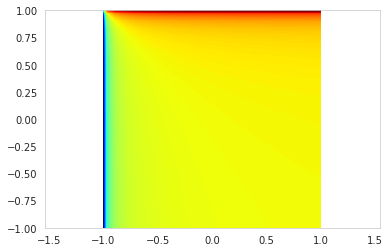

In [48]:
## если data = 1, тест положительный
def compute_posterior(data, prior_prob=0.01, tp_probability=0.95, tn_probability=0.95):
    if data == 1:
        return (prior_prob * tp_probability) / (prior_prob * tp_probability + (1-prior_prob) * (1-tp_probability))
    elif data == 0:
        return (prior_prob * (1 - tn_probability)) / (prior_prob * (1-tn_probability) + (1-prior_prob) * tn_probability)
    else:
        return None

global_prior_prob=0.01

def diagnostics_odds_ratio(tp_probability, tn_probability):
  fp_share = compute_posterior(1, global_prior_prob, tp_probability, tn_probability)
  tn_share = 1 - fp_share
  tp_share = compute_posterior(0, global_prior_prob, tp_probability, tn_probability)
  fn_share = 1 - tp_share
  return fp_share + fn_share
  # result = (tp_share / fn_share) / (fp_share / tn_share)
  # if result == float("inf"):
  #   result = None
  # else:
  #   result = math.log(result)
  # return result

def calc_diagnostics_odds_ratio(point_num = 250):
  result = np.ndarray(shape=(point_num, point_num))
  probs = np.arange(0, 1, 1 / point_num)
  for i in range(point_num):
    for j in range(point_num):
      result[i][j] = diagnostics_odds_ratio(probs[i], probs[j])
  return result

# vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
# xs = np.arange(0, 0.31, 0.01)
# ys_one = vector_posterior(1, prior_prob=xs)
# ys_zero = vector_posterior(0, prior_prob=xs)

# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
# ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста')
# ax.set_xlim((0.0, 0.3))
# ax.set_xlabel('Априорная вероятность болезни', fontsize=legend_fontsize)
# ax.legend(fontsize=legend_fontsize)
# fig.savefig('intro1.pdf', bbox_inches='tight')
# plt.show()


def myplot_heatmap(Z, point_num = 250):
    # Make the plot
    print(Z)
    plt.axis('equal')
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    X = np.linspace(-1, 1, point_num)
    Y = np.linspace(-1, 1, point_num)
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.show()

myplot_heatmap(calc_diagnostics_odds_ratio())